In [ ]:
!pip3 install tshark

ERROR: Could not find a version that satisfies the requirement tshark (from versions: none)
ERROR: No matching distribution found for tshark


In [3]:
import pandas as pd
import os
import subprocess
import datetime as dt

In [4]:
with open('mitm_dump.csv', 'w') as f:
  subprocess.run("tshark -N n -r dump.pcap -t ad -T fields -e frame.number -e _ws.col.Time -e _ws.col.Source -e _ws.col.Destination -e _ws.col.Protocol -e _ws.col.Length -e _ws.col.Info -E header=n -E separator=/	".split(), stdout =f)

In [ ]:
columns = ['id', 'time', 'source', 'destination', 'protocol', 'length', 'info']
df = pd.read_csv('mitm_dump.csv', delimiter ='\\', names=columns, header=None)
df.head()

,id,time,source,destination,protocol,length,info
0,1,2024-03-21 04:29:59.453157,08:00:27:1e:36:4a,ff:ff:ff:ff:ff:ff,ARP,42,Who has 192.168.56.105? Tell 192.168.56.104
1,2,2024-03-21 04:29:59.453504,08:00:27:fb:c0:99,08:00:27:1e:36:4a,ARP,60,192.168.56.105 is at 08:00:27:fb:c0:99
2,3,2024-03-21 04:29:59.463537,08:00:27:1e:36:4a,ff:ff:ff:ff:ff:ff,ARP,42,Who has 192.168.56.102? Tell 192.168.56.104
3,4,2024-03-21 04:29:59.463886,08:00:27:a1:b9:a7,08:00:27:1e:36:4a,ARP,60,192.168.56.102 is at 08:00:27:a1:b9:a7
4,5,2024-03-21 04:30:00.474818,192.168.56.102,192.168.56.105,ICMP,42,"Echo (ping) request id=0x7ee7, seq=32487/5926..."


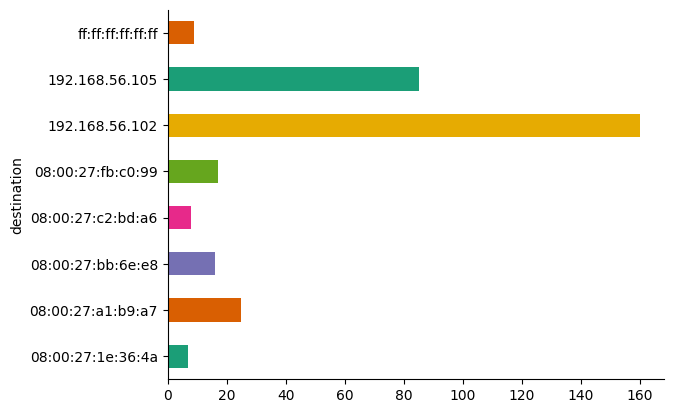

In [ ]:
# @title destination

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('destination').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

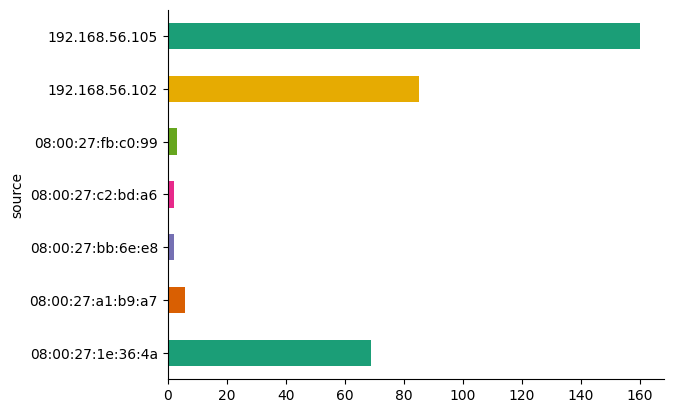

In [ ]:
# @title source

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

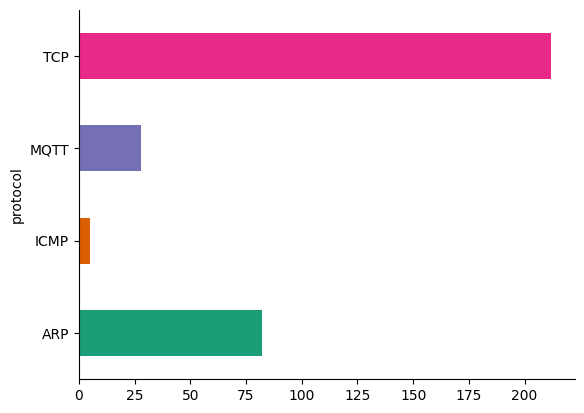

In [ ]:
# @title protocol

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('protocol').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [ ]:
df['date'] = df['time'].dt.date
df['time'] = df['time'].dt.time

In [ ]:
df.source.value_counts()

source
192.168.56.105       160
192.168.56.102        85
08:00:27:1e:36:4a     69
08:00:27:a1:b9:a7      6
08:00:27:fb:c0:99      3
08:00:27:c2:bd:a6      2
08:00:27:bb:6e:e8      2
Name: count, dtype: int64